# Customer Segmentation Analysis Using K-Means Clustering
## A Data Science Project for Marketing Strategy Optimization

### Project Overview

This project demonstrates customer segmentation using unsupervised machine learning techniques.
By analyzing customer behavior patterns, we can identify distinct customer groups for targeted marketing campaigns.

Business Objectives:
- Identify VIP customers with high spending potential
- Discover bargain hunters and price-sensitive segments
- Find occasional buyers for retention strategies
- Enable personalized marketing campaigns


In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 Customer Segmentation Analysis")
print("="*50)

🔍 Customer Segmentation Analysis


In [3]:

# Load and Explore Data
print("\n STEP 1: DATA LOADING AND EXPLORATION")
print("-" * 40)

df = pd.read_csv(r"C:\Users\Mohsu\Desktop\Customer Segmentation\Mall_Customers.csv")
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage().sum() / 1024:.2f} KB")

# Display basic information
print("\n Dataset Overview:")
print(df.head(5))




 STEP 1: DATA LOADING AND EXPLORATION
----------------------------------------
Dataset Shape: (200, 5)
Memory Usage: 7.94 KB

 Dataset Overview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print("\n Statistical Summary:")
print(df.describe())

print("\n Data Types and Missing Values:")
print(df.info())


 Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

 Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender       

In [5]:
 # Data Quality Check
print("\n DATA QUALITY ASSESSMENT")
print("-" * 30)
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")




 DATA QUALITY ASSESSMENT
------------------------------
Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Rows: 0



 STEP 2: EXPLORATORY DATA ANALYSIS
----------------------------------------


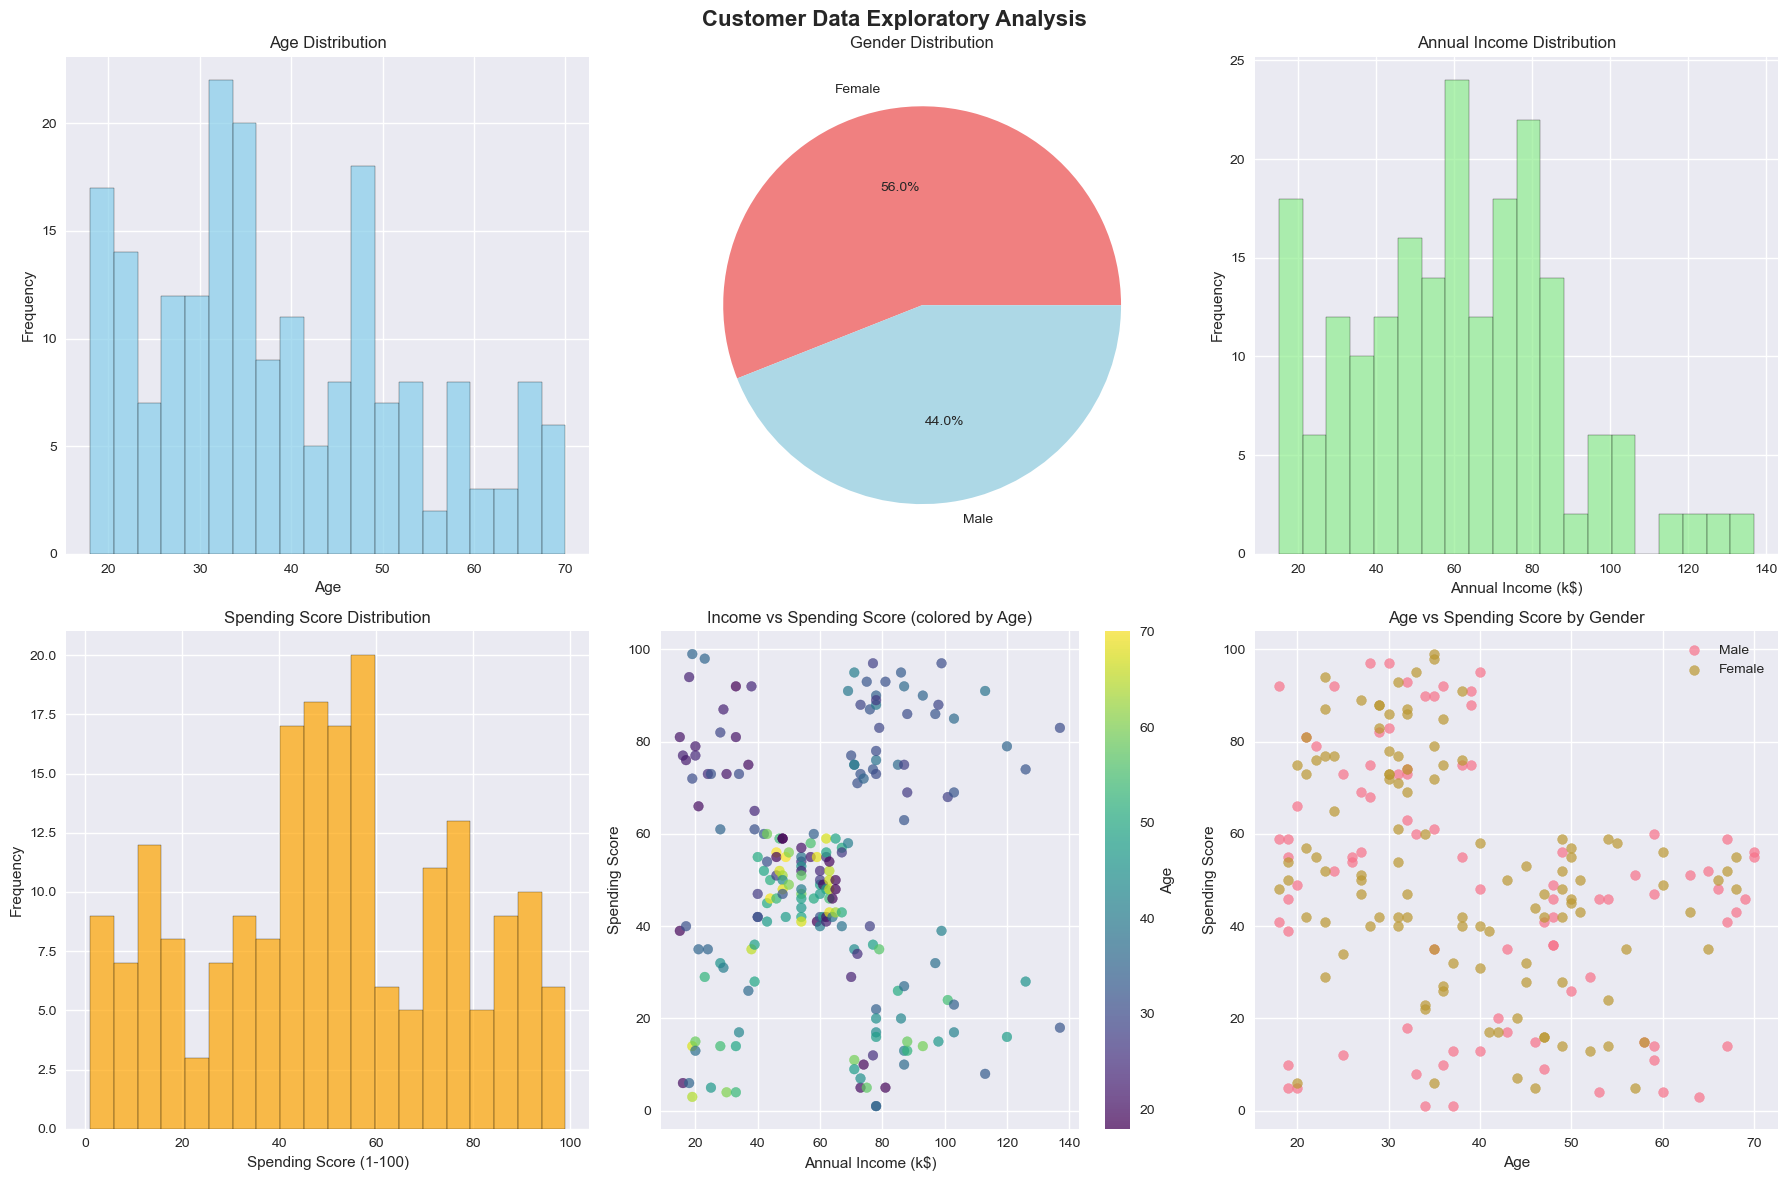

In [13]:

print("\n STEP 2: EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Customer Data Exploratory Analysis', fontsize=16, fontweight='bold')

# 1. Age Distribution
axes[0, 0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               colors=['lightcoral', 'lightblue'])
axes[0, 1].set_title('Gender Distribution')

# 3. Annual Income Distribution
axes[0, 2].hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Annual Income Distribution')
axes[0, 2].set_xlabel('Annual Income (k$)')
axes[0, 2].set_ylabel('Frequency')

# 4. Spending Score Distribution
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].set_xlabel('Spending Score (1-100)')
axes[1, 0].set_ylabel('Frequency')

# 5. Income vs Spending Score Scatter Plot
scatter = axes[1, 1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                           c=df['Age'], cmap='viridis', alpha=0.7)
axes[1, 1].set_title('Income vs Spending Score (colored by Age)')
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Spending Score')
plt.colorbar(scatter, ax=axes[1, 1], label='Age')

# 6. Age vs Spending Score by Gender
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    axes[1, 2].scatter(gender_data['Age'], gender_data['Spending Score (1-100)'], 
                      label=gender, alpha=0.7, s=50)
axes[1, 2].set_title('Age vs Spending Score by Gender')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Spending Score')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

In [14]:
# Correlation Analysis
print("\n🔗 Correlation Analysis:")
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)


🔗 Correlation Analysis:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


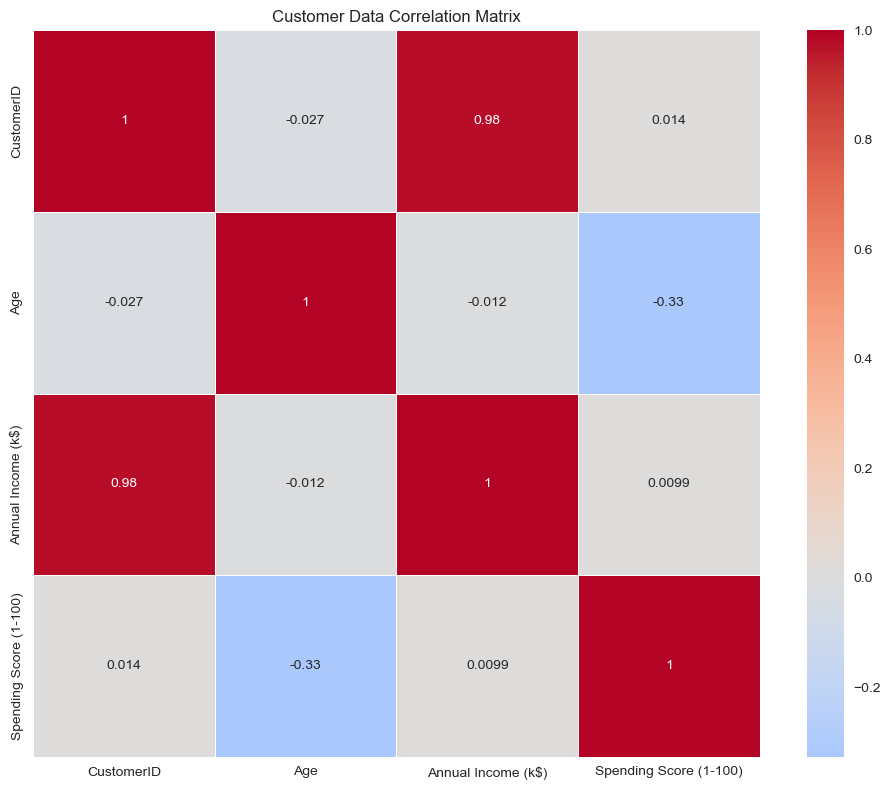

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Customer Data Correlation Matrix')
plt.tight_layout()
plt.show()

In [20]:
print("\n STEP 3: FEATURE ENGINEERING AND PREPROCESSING")
print("-" * 50)

# Select features for clustering
# We'll use Age, Annual Income, and Spending Score for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

print("Selected Features for Clustering:")
print(X.head())

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nFeatures After Standardization:")
print(X_scaled_df.head())
print(f"\nScaled Data - Mean: {X_scaled_df.mean().round(3).tolist()}")
print(f"Scaled Data - Std: {X_scaled_df.std().round(3).tolist()}")






 STEP 3: FEATURE ENGINEERING AND PREPROCESSING
--------------------------------------------------
Selected Features for Clustering:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

Features After Standardization:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

Scaled Data - Mean: [-0.0, -0.0, -0.0]
Scaled Data - Std: [1.003, 1.003, 1.003]


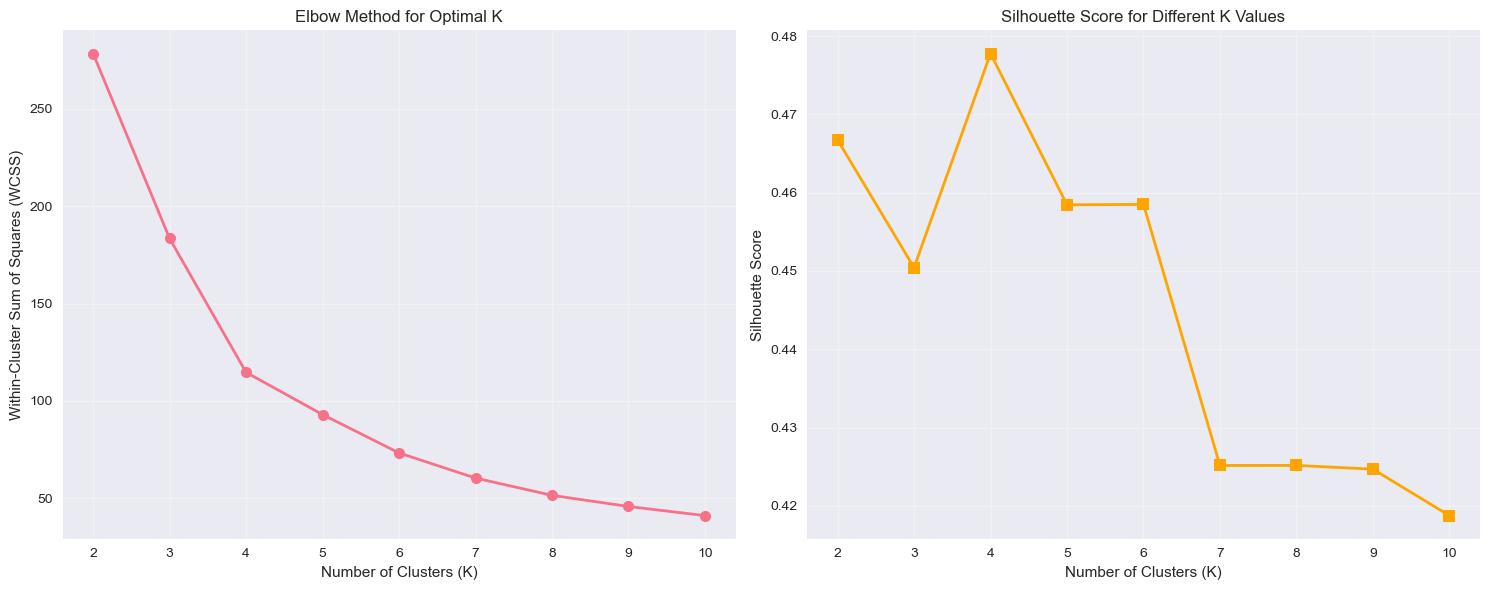

In [21]:
# Plot Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Plot
ax1.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
ax1.set_title('Elbow Method for Optimal K')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.grid(True, alpha=0.3)

# Silhouette Score Plot
ax2.plot(K_range, silhouette_scores, marker='s', color='orange', linewidth=2, markersize=8)
ax2.set_title('Silhouette Score for Different K Values')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Find optimal K
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n Optimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")




 Optimal number of clusters based on Silhouette Score: 4
Best Silhouette Score: 0.478


In [26]:
print("\n STEP 5: K-MEANS CLUSTERING")
print("-" * 35)

# Apply K-Means with optimal K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels
df['Cluster_Name'] = df['Cluster'].map({
    0: 'Budget Conscious',
    1: 'High Spenders', 
    2: 'Moderate Customers',
    3: 'VIP Customers',
    4: 'Occasional Buyers'
})

print(f"Clustering completed with {optimal_k} clusters")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
# Cluster Summary
print("\n📊 CLUSTER ANALYSIS SUMMARY")
print("-" * 35)

cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
}).round(2)

cluster_summary.columns = ['Age_Mean', 'Age_Std', 'Income_Mean', 'Income_Std', 
                          'Spending_Mean', 'Spending_Std', 'Customer_Count']
print(cluster_summary)




 STEP 5: K-MEANS CLUSTERING
-----------------------------------
Clustering completed with 4 clusters
Silhouette Score: 0.404

📊 CLUSTER ANALYSIS SUMMARY
-----------------------------------
         Age_Mean  Age_Std  Income_Mean  Income_Std  Spending_Mean  \
Cluster                                                              
0           53.98     9.42        47.71       14.65          39.97   
1           32.88     3.86        86.10       16.34          81.53   
2           25.44     5.71        40.00       17.03          60.30   
3           39.37    10.62        86.50       16.76          19.58   

         Spending_Std  Customer_Count  
Cluster                                
0               16.41              65  
1               10.00              40  
2               18.43              57  
3               11.68              38  


In [28]:
# Cluster Characteristics
print("\n CUSTOMER SEGMENT INSIGHTS")
print("-" * 35)

for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    cluster_name = cluster_data['Cluster_Name'].iloc[0]
    
    print(f"\n CLUSTER {cluster_id}: {cluster_name}")
    print(f"   Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"   Avg Age: {cluster_data['Age'].mean():.1f} years")
    print(f"   Avg Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"   Avg Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    
    # Gender distribution in cluster
    gender_dist = cluster_data['Gender'].value_counts(normalize=True) * 100
    print(f"   Gender: {gender_dist.to_dict()}")


 CUSTOMER SEGMENT INSIGHTS
-----------------------------------

 CLUSTER 0: Budget Conscious
   Size: 65 customers (32.5%)
   Avg Age: 54.0 years
   Avg Income: $47.7k
   Avg Spending Score: 40.0/100
   Gender: {'Female': 56.92307692307692, 'Male': 43.07692307692308}

 CLUSTER 1: High Spenders
   Size: 40 customers (20.0%)
   Avg Age: 32.9 years
   Avg Income: $86.1k
   Avg Spending Score: 81.5/100
   Gender: {'Female': 55.00000000000001, 'Male': 45.0}

 CLUSTER 2: Moderate Customers
   Size: 57 customers (28.5%)
   Avg Age: 25.4 years
   Avg Income: $40.0k
   Avg Spending Score: 60.3/100
   Gender: {'Female': 59.64912280701754, 'Male': 40.35087719298245}

 CLUSTER 3: VIP Customers
   Size: 38 customers (19.0%)
   Avg Age: 39.4 years
   Avg Income: $86.5k
   Avg Spending Score: 19.6/100
   Gender: {'Female': 50.0, 'Male': 50.0}



 STEP 6: CLUSTER VISUALIZATION
-----------------------------------


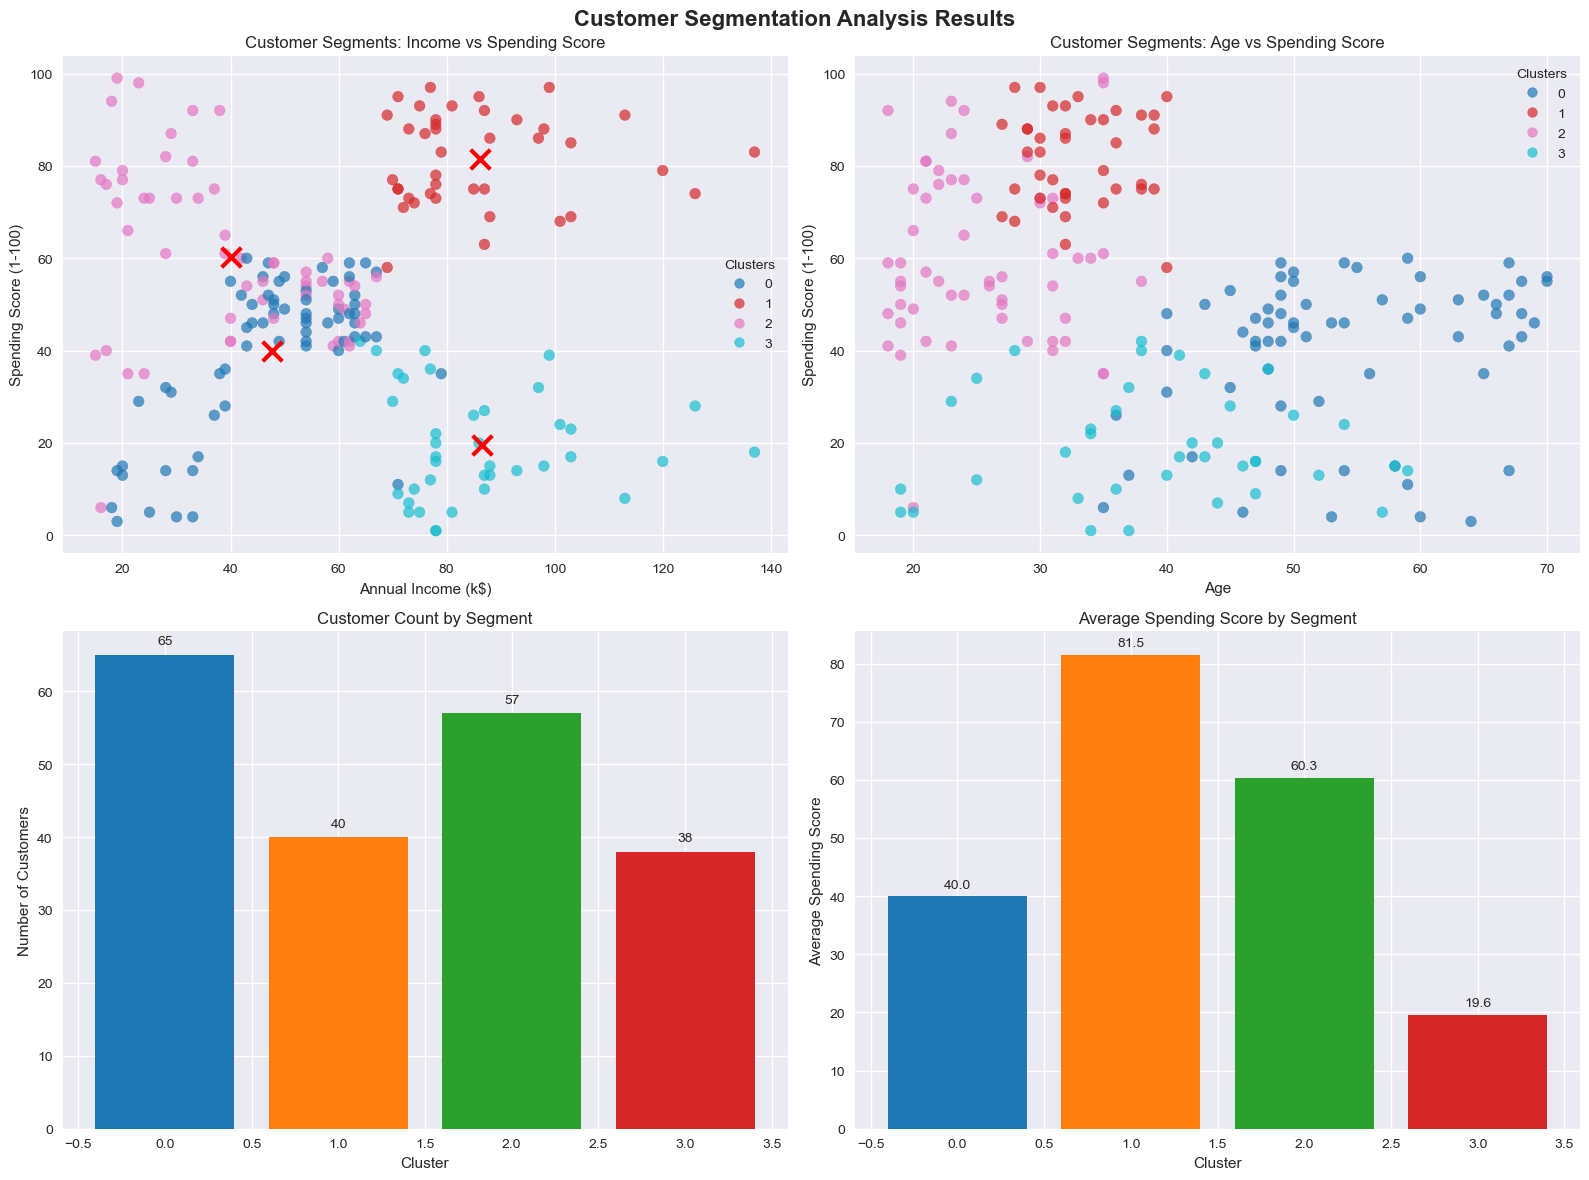

In [31]:
print("\n STEP 6: CLUSTER VISUALIZATION")
print("-" * 35)

# Create comprehensive cluster visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis Results', fontsize=16, fontweight='bold')

# 1. 3D Scatter Plot (Income vs Spending, colored by cluster)
scatter1 = axes[0, 0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                             c=df['Cluster'], cmap='tab10', s=60, alpha=0.7)
axes[0, 0].set_title('Customer Segments: Income vs Spending Score')
axes[0, 0].set_xlabel('Annual Income (k$)')
axes[0, 0].set_ylabel('Spending Score (1-100)')

# Add cluster centers
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
axes[0, 0].scatter(centers[:, 1], centers[:, 2], c='red', marker='x', s=200, linewidths=3)
axes[0, 0].legend(*scatter1.legend_elements(), title="Clusters")

# 2. Age vs Spending Score
scatter2 = axes[0, 1].scatter(df['Age'], df['Spending Score (1-100)'], 
                             c=df['Cluster'], cmap='tab10', s=60, alpha=0.7)
axes[0, 1].set_title('Customer Segments: Age vs Spending Score')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Spending Score (1-100)')
axes[0, 1].legend(*scatter2.legend_elements(), title="Clusters")

# 3. Cluster Size Distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
bars = axes[1, 0].bar(cluster_counts.index, cluster_counts.values, 
                     color=plt.cm.tab10(np.arange(len(cluster_counts))))
axes[1, 0].set_title('Customer Count by Segment')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Customers')

# Add value labels on bars
for bar, count in zip(bars, cluster_counts.values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   str(count), ha='center', va='bottom')

# 4. Average Spending Score by Cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
bars2 = axes[1, 1].bar(avg_spending.index, avg_spending.values,
                      color=plt.cm.tab10(np.arange(len(avg_spending))))
axes[1, 1].set_title('Average Spending Score by Segment')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Spending Score')

# Add value labels on bars
for bar, score in zip(bars2, avg_spending.values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'{score:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [33]:
print("\n STEP 7: BUSINESS RECOMMENDATIONS")
print("-" * 40)

# Generate business insights and recommendations
recommendations = {
    0: {
        'name': 'Budget Conscious Customers',
        'strategy': 'Price-based promotions, discount campaigns, value products',
        'marketing': 'Email campaigns with special offers, loyalty programs'
    },
    1: {
        'name': 'High Spenders',
        'strategy': 'Premium products, exclusive services, personalized experience',
        'marketing': 'VIP treatment, early access to new products, premium customer service'
    },
    2: {
        'name': 'Moderate Customers',
        'strategy': 'Balanced approach, seasonal campaigns, cross-selling',
        'marketing': 'Regular newsletters, product recommendations, moderate discounts'
    },
    3: {
        'name': 'VIP Customers',
        'strategy': 'Luxury products, exclusive events, premium services',
        'marketing': 'Personal shopping assistants, invitation-only events, concierge services'
    },
    4: {
        'name': 'Occasional Buyers',
        'strategy': 'Re-engagement campaigns, special incentives, retention programs',
        'marketing': 'Win-back campaigns, special offers, product trials'
    }
}

for cluster_id in sorted(df['Cluster'].unique()):
    if cluster_id in recommendations:
        rec = recommendations[cluster_id]
        print(f"\n CLUSTER {cluster_id}: {rec['name']}")
        print(f"    Strategy: {rec['strategy']}")
        print(f"    Marketing: {rec['marketing']}")



 STEP 7: BUSINESS RECOMMENDATIONS
----------------------------------------

 CLUSTER 0: Budget Conscious Customers
    Strategy: Price-based promotions, discount campaigns, value products
    Marketing: Email campaigns with special offers, loyalty programs

 CLUSTER 1: High Spenders
    Strategy: Premium products, exclusive services, personalized experience
    Marketing: VIP treatment, early access to new products, premium customer service

 CLUSTER 2: Moderate Customers
    Strategy: Balanced approach, seasonal campaigns, cross-selling
    Marketing: Regular newsletters, product recommendations, moderate discounts

 CLUSTER 3: VIP Customers
    Strategy: Luxury products, exclusive events, premium services
    Marketing: Personal shopping assistants, invitation-only events, concierge services


In [35]:

# Model performance metrics
print(f"\n📊 FINAL MODEL PERFORMANCE")
print("-" * 30)
print(f"Number of Clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
print(f"Total Customers Analyzed: {len(df)}")
print(f"Features Used: {', '.join(features)}")

print(f"\n CUSTOMER SEGMENTATION ANALYSIS COMPLETE!")




📊 FINAL MODEL PERFORMANCE
------------------------------
Number of Clusters: 4
Silhouette Score: 0.404
Total Customers Analyzed: 200
Features Used: Age, Annual Income (k$), Spending Score (1-100)

🎉 CUSTOMER SEGMENTATION ANALYSIS COMPLETE!
Ready for deployment and business implementation!


In [ ]:
# Save results
